Description

In [8]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_91d63d15c52e47739866a6d2048b8da0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JG0Vf_KdNEu-SlnKXFVwVA0RK21HeuHcJaouFzo6dwU7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_91d63d15c52e47739866a6d2048b8da0.get_object(Bucket='mltrial-donotdelete-pr-nguzssndypvxnn',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0               71.279624         65.0      1154   19.1  ...   
1               73.523582         62.0       492   18.6  ...   
2               73.219243         64.0       430   18.1  ...   
3               78.184215         67.0      2787   17.6  ...   
4                7.097109         68.0      3013   17.2  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  Life expectancy   
0                            0.479       10.1              65.0  
1                            0.476       10.0              59.9  
2                            0.470        9.9              59.9  
3                            0.463        9.8              59.5  
4                            0.454        9.5              59.2  

[5 rows x 22 columns]

In [4]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null float64
GDP                                2490 non-null

In [5]:
df_data_1.describe()

Year  Adult Mortality  infant deaths      Alcohol  \
count  2938.000000      2928.000000    2938.000000  2744.000000   
mean   2007.518720       164.796448      30.303948     4.602861   
std       4.613841       124.292079     117.926501     4.052413   
min    2000.000000         1.000000       0.000000     0.010000   
25%    2004.000000        74.000000       0.000000     0.877500   
50%    2008.000000       144.000000       3.000000     3.755000   
75%    2012.000000       228.000000      22.000000     7.702500   
max    2015.000000       723.000000    1800.000000    17.870000   

       percentage expenditure  Hepatitis B       Measles          BMI   \
count             2938.000000  2385.000000    2938.000000  2904.000000   
mean               738.251295    80.940461    2419.592240    38.321247   
std               1987.914858    25.070016   11467.272489    20.044034   
min                  0.000000     1.000000       0.000000     1.000000   
25%                  4.685343    77.000000       0.000000    19.300000   
50%                 64.912906    92.000000      17.000000    43.500000   
75%                441.534144    97.000000     360.250000    56.200000   
max              19479.911610    99.000000  212183.000000    87.300000   

       under-five deaths         Polio  Total expenditure  Diphtheria   \
count         2938.000000  2919.000000         2712.00000  2919.000000   
mean            42.035739    82.550188            5.93819    82.324084   
std            160.445548    23.428046            2.49832    23.716912   
min              0.000000     3.000000            0.37000     2.000000   
25%              0.000000    78.000000            4.26000    78.000000   
50%              4.000000    93.000000            5.75500    93.000000   
75%             28.000000    97.000000            7.49250    97.000000   
max           2500.000000    99.000000           17.60000    99.000000   

          HIV/AIDS            GDP    Population   thinness  1-19 years  \
count  2938.000000    2490.000000  2.286000e+03            2904.000000   
mean      1.742103    7483.158469  1.275338e+07               4.839704   
std       5.077785   14270.169342  6.101210e+07               4.420195   
min       0.100000       1.681350  3.400000e+01               0.100000   
25%       0.100000     463.935626  1.957932e+05               1.600000   
50%       0.100000    1766.947595  1.386542e+06               3.300000   
75%       0.800000    5910.806335  7.420359e+06               7.200000   
max      50.600000  119172.741800  1.293859e+09              27.700000   

        thinness 5-9 years  Income composition of resources    Schooling  \
count          2904.000000                      2771.000000  2775.000000   
mean              4.870317                         0.627551    11.992793   
std               4.508882                         0.210904     3.358920   
min               0.100000                         0.000000     0.000000   
25%               1.500000                         0.493000    10.100000   
50%               3.300000                         0.677000    12.300000   
75%               7.200000                         0.779000    14.300000   
max              28.600000                         0.948000    20.700000   

       Life expectancy   
count       2928.000000  
mean          69.224932  
std            9.523867  
min           36.300000  
25%           63.100000  
50%           72.100000  
75%           75.700000  
max           89.000000

In [6]:
sns.pairplot(df_data_1)

NameError: name 'sns' is not defined

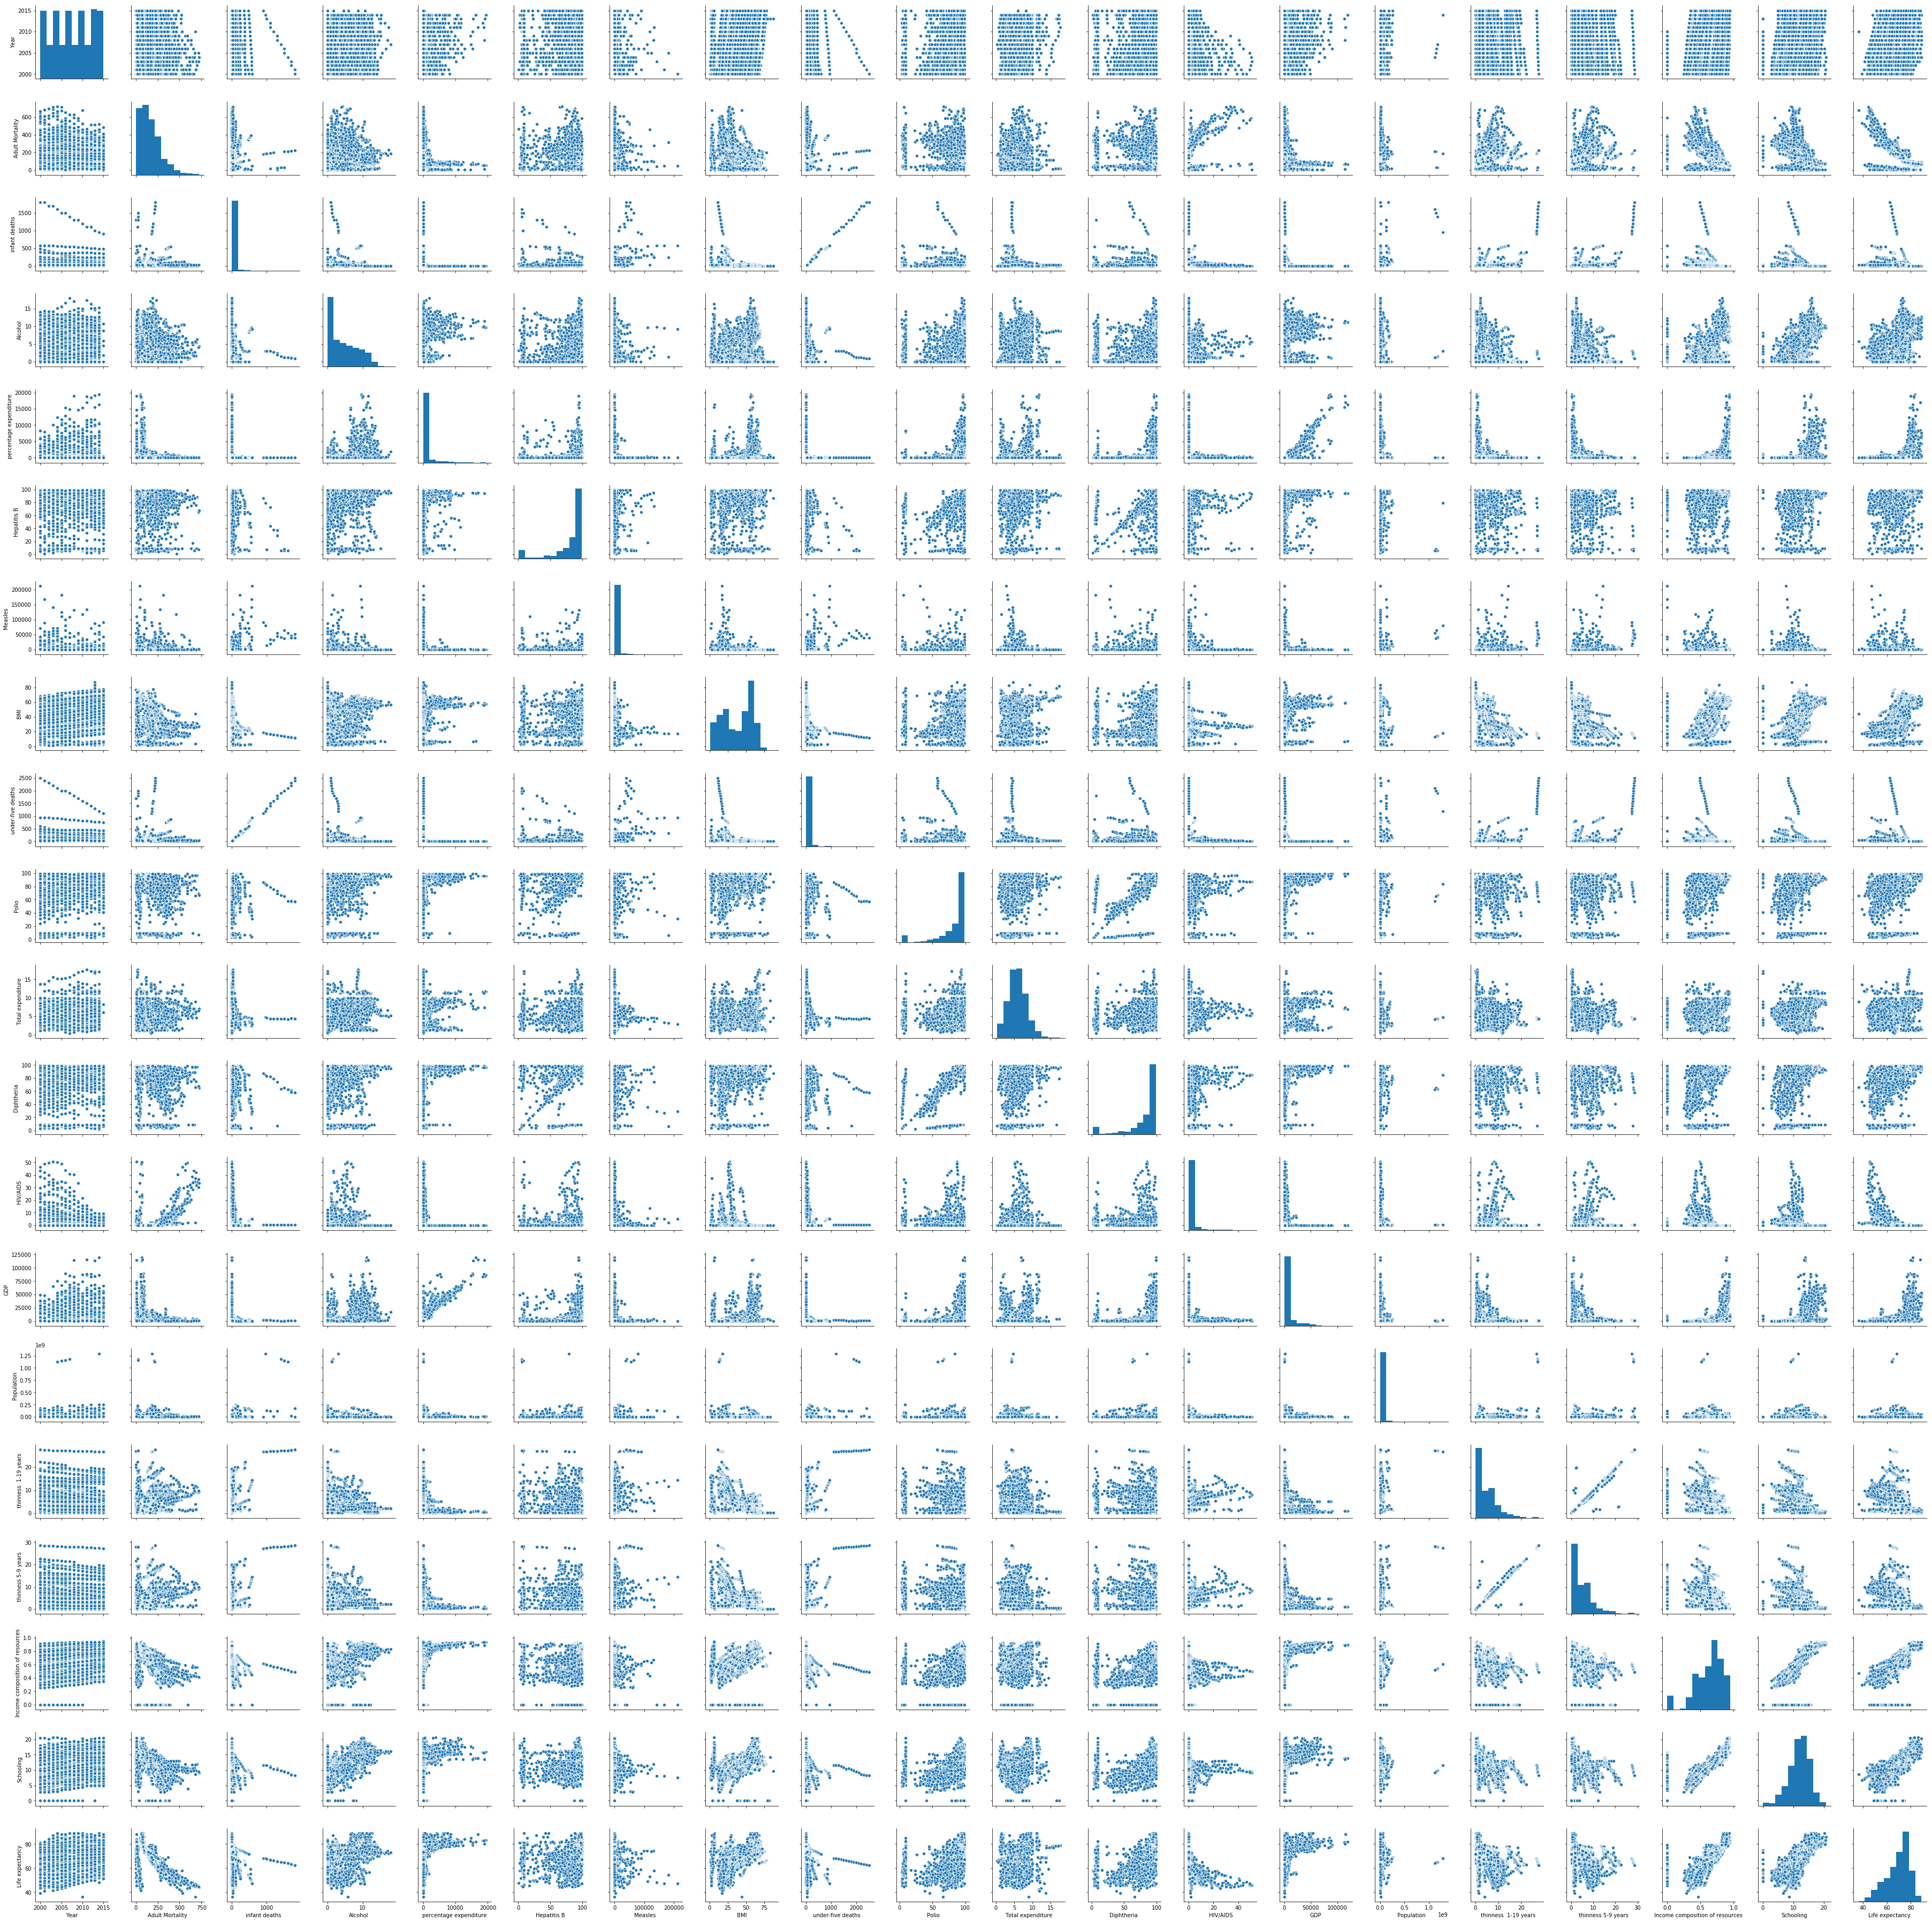

In [10]:
sns.pairplot(df_data_1)

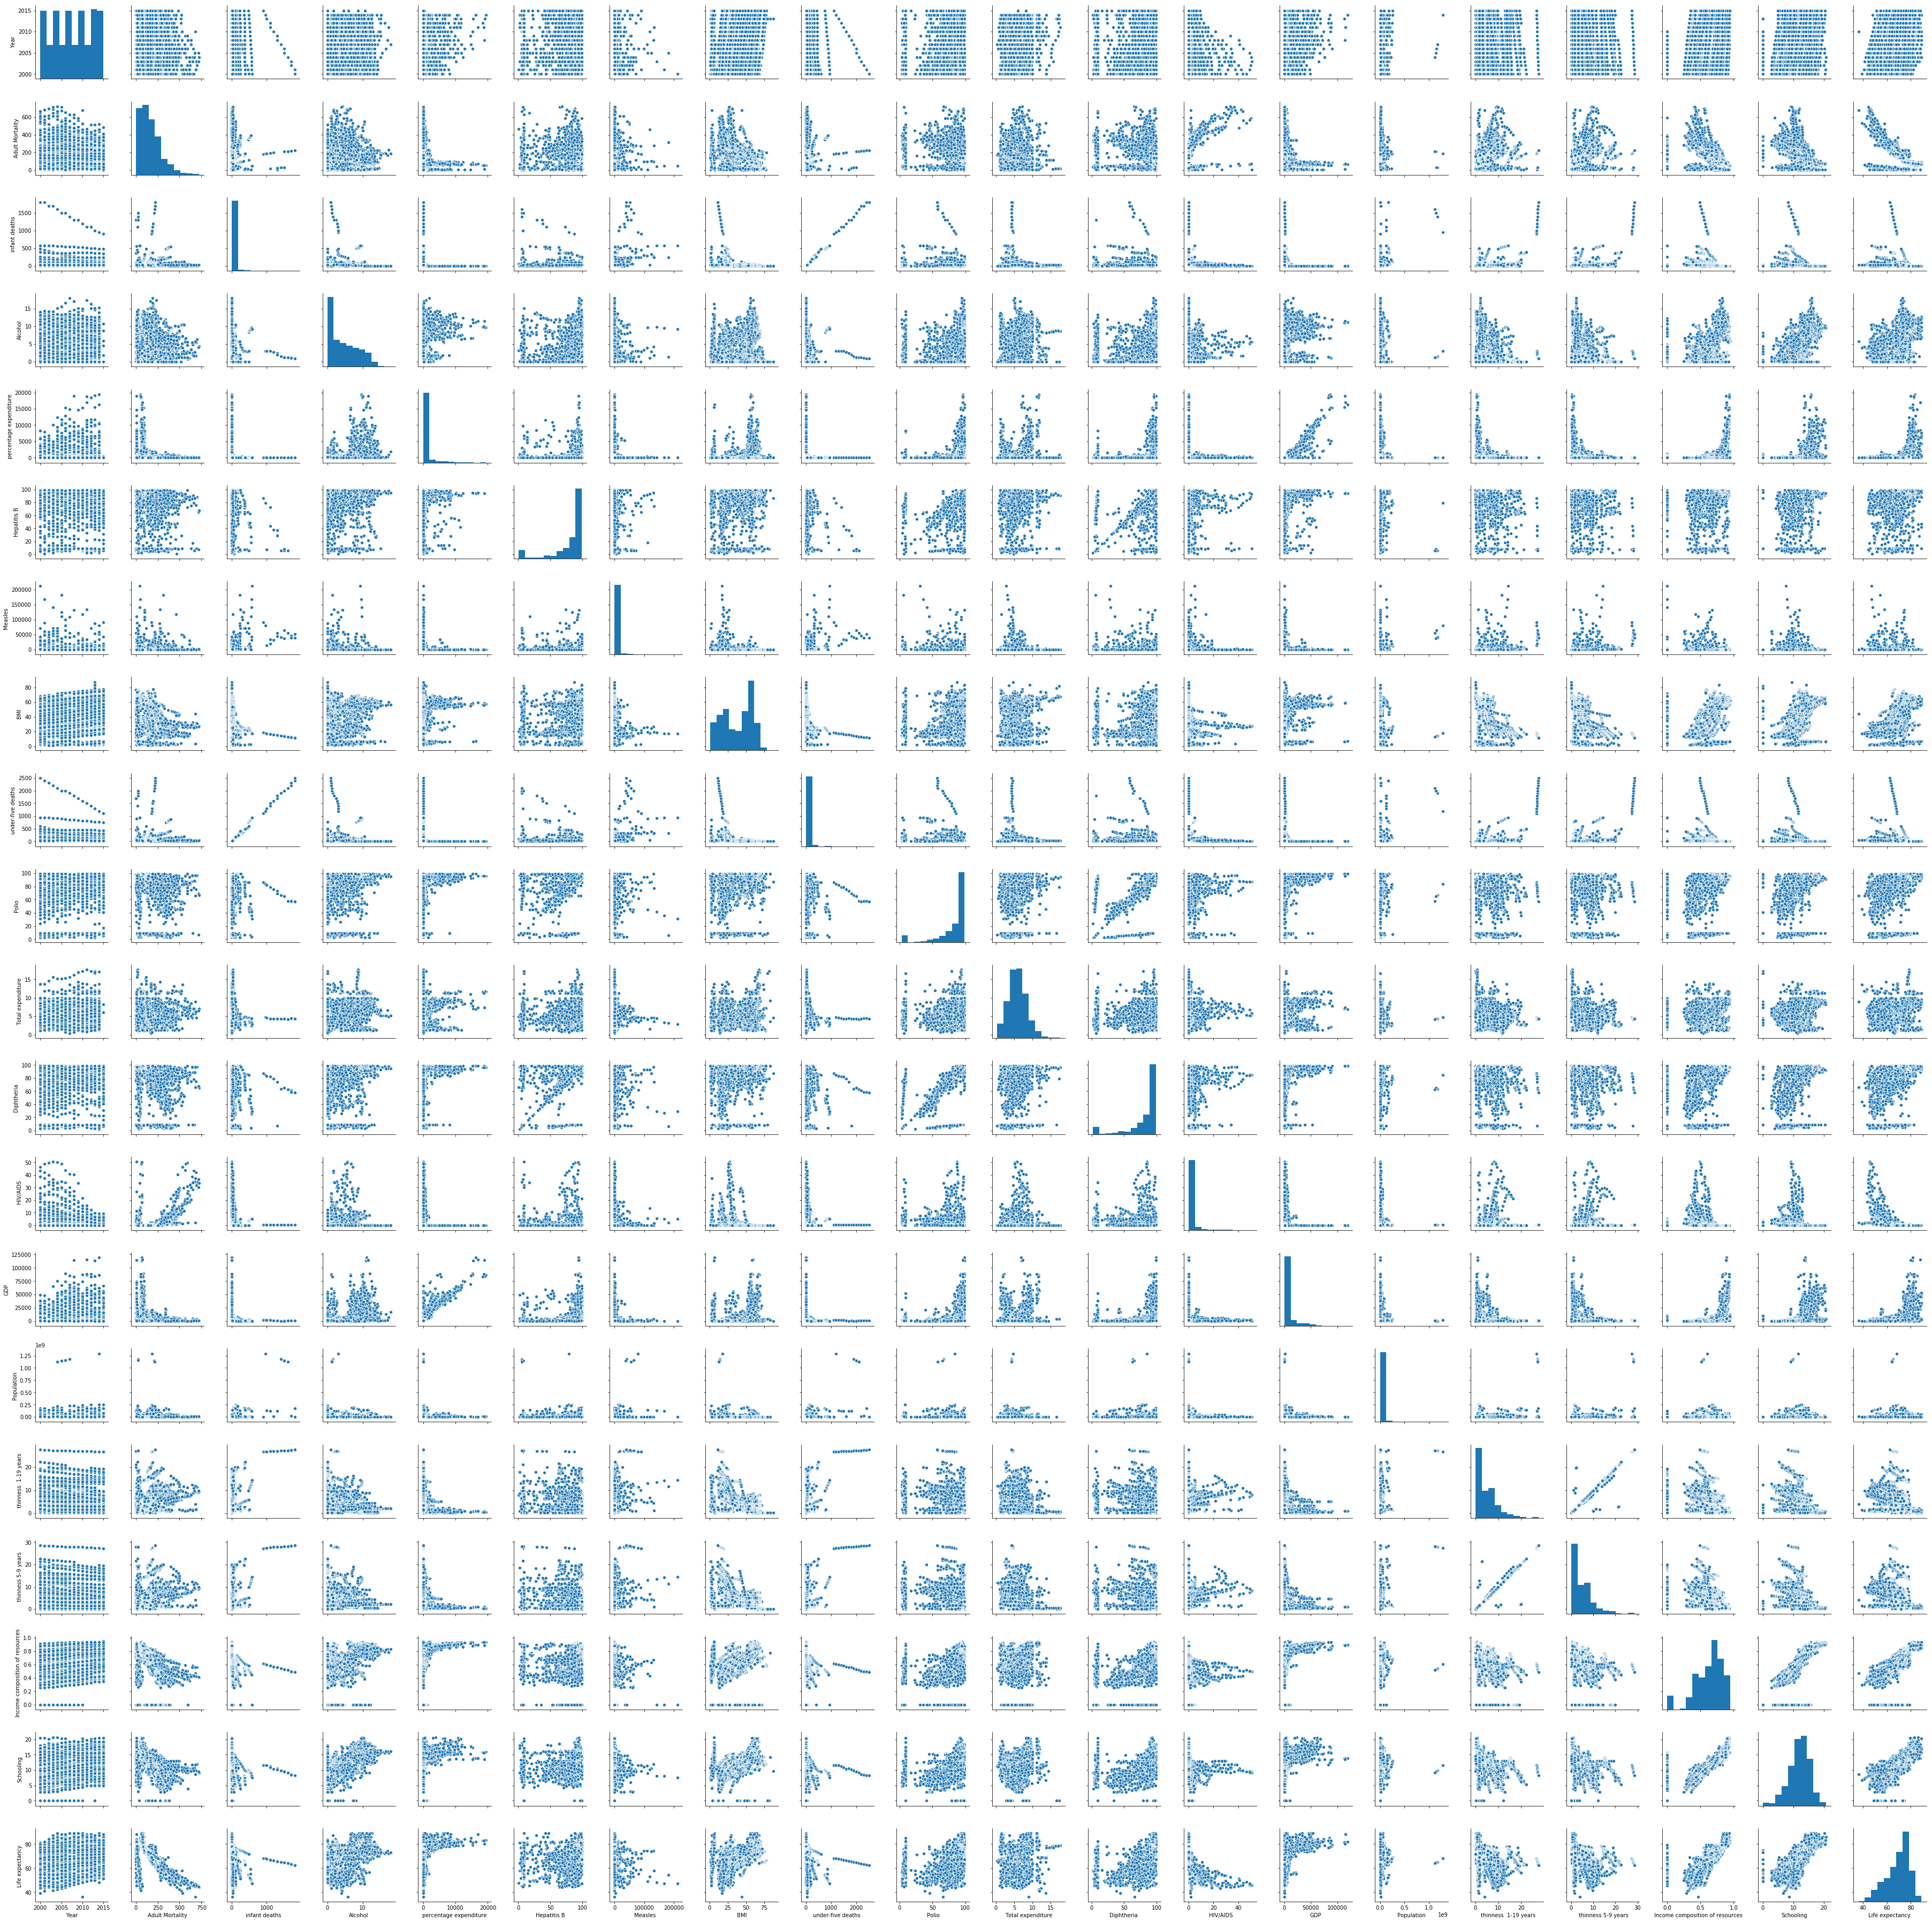

In [11]:
sns.pairplot(df_data_1)

In [13]:
df_data_1=df_data_1.drop(['Country'],axis=1)
housing_map = {'Developing': 1, 'Developed': 0}
df_data_1['Status'] = df_data_1['Status'].map(housing_map)

In [14]:

df_data_1.fillna(df_data_1.mean(), inplace=True)

In [15]:
x=df_data_1.drop(['Life expectancy '],axis=1)
y=df_data_1['Life expectancy ']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
y_pred=model.predict(x_test)

In [20]:
print(y_pred)

[49.78536603 61.54524653 77.43435644 65.93087427 70.83590838 70.73399366
 72.43088612 77.74290628 64.45232913 79.78574777 63.96464853 69.05888752
 77.93708975 74.42570646 56.95202469 69.6020859  64.94598591 70.79365722
 68.73695796 75.7603158  53.58293841 61.42719628 77.2169105  69.1629711
 65.44698144 51.45212394 74.65462696 73.82048993 63.20935964 71.58247792
 59.916736   64.44246037 73.62571069 73.21753062 76.314113   72.74739642
 75.32270919 63.85225553 67.98871303 61.73213536 63.20169098 81.74014651
 62.98731585 71.04482657 68.72460942 71.27317894 71.94325768 76.38189034
 75.47391461 68.72160726 73.1257177  75.80509994 50.5656658  81.71184025
 64.65646833 59.94159429 78.08904207 73.06868691 76.58729629 57.22505339
 70.63878099 68.86395761 69.60419705 83.82180924 72.41101727 63.28311986
 72.53950621 73.76575309 76.86205168 69.84459598 68.9931704  61.61078879
 75.03518553 70.03333859 78.69424449 50.5054821  58.31026236 60.73504002
 78.46738272 58.42028933 50.29734187 68.08400068 60.

In [22]:
from sklearn.metrics import r2_score
from sklearn import metrics
score=r2_score(y_test,y_pred)
print(score)

0.822279335848813


In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.9615292869640415
MSE: 15.380243443610489
RMSE: 3.9217653478517156


In [24]:
!pip install watson-machine-learning-client


In [25]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-14 07:45:15,964 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [26]:
wml_creds={
  "apikey": "_c2Y6WxGKHScs2zIDM1QK8V9nqNbhmtL-N5Kir_OwlRJ",
  "instance_id": "d010c6b1-6a02-46d8-b058-dda3bee8d92c",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [27]:
client = WatsonMachineLearningAPIClient( wml_creds )

In [28]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Siddhi Belgamwar", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "belgamwarss@rknec.edu", 
               client.repository.ModelMetaNames.NAME: "Life-Expectancy"}

In [29]:
model_artifact =client.repository.store_model(model, meta_props=model_props)

In [30]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'0f3786f7-30ec-4b8f-b795-466c90c57240'

In [31]:
deployment = client.deployments.create(published_model_uid, name="Life-Expectancy")



#######################################################################################

Synchronous deployment creation for uid: '0f3786f7-30ec-4b8f-b795-466c90c57240' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='457d57fe-410e-49f2-be7a-41979df771ef'
------------------------------------------------------------------------------------------------




In [32]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/d010c6b1-6a02-46d8-b058-dda3bee8d92c/deployments/457d57fe-410e-49f2-be7a-41979df771ef/online'